In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Using TensorFlow backend.


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


7


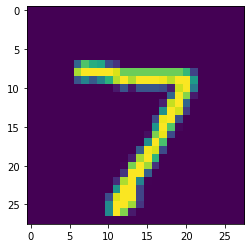

In [2]:
print(y_test[0])
plt.imshow(x_test[0])

In [3]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)

(60000, 10)


In [4]:
x_train = (x_train/255).reshape(60000, 28, 28, 1)
x_test = (x_test/255).reshape(10000, 28, 28, 1)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(5, (2,2), input_shape=(28,28,1), padding='same')) 
model.add(Conv2D(32, (3,3), padding='same')) 
model.add(Conv2D(64, (2,2), padding='same')) 
# model.add(Conv2D(16, (2,2), padding='same'))
model.add(Conv2D(5, (2,2), padding='same')) 
# model.add(Conv2D(5, (2,2), strides=2))  # (3,3,5) 6/2=3
# model.add(Conv2D(5, (2,2), strides=2, padding='same'))  # (3,3,5) 6/2=3
# model.add(MaxPooling2D(pool_size=2)) # (None, 3, 3, 5)
# 4차원을 2차원으로 쫙 펴준다
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        1472      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        8256      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 5)         1285      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                39210     
Total params: 50,248
Trainable params: 50,248
Non-trainable params: 0
__________________________________________________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])  
hist = model.fit(x_train,y_train, epochs=50, validation_split=0.2, batch_size=500)
# 과적합이 전혀 없다... ㄷㄷ

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 82us/step - loss: 0.5147 - acc: 0.8500 - val_loss: 0.3062 - val_acc: 0.9109
Epoch 2/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.3063 - acc: 0.9122 - val_loss: 0.2888 - val_acc: 0.9178
Epoch 3/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.2919 - acc: 0.9171 - val_loss: 0.2755 - val_acc: 0.9256
Epoch 4/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.2858 - acc: 0.9184 - val_loss: 0.2689 - val_acc: 0.9239
Epoch 5/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.2793 - acc: 0.9218 - val_loss: 0.2749 - val_acc: 0.9238
Epoch 6/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.2758 - acc: 0.9231 - val_loss: 0.2722 - val_acc: 0.9240
Epoch 7/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.2735 - acc: 0.9230 - val_loss: 0.2683 - val_acc

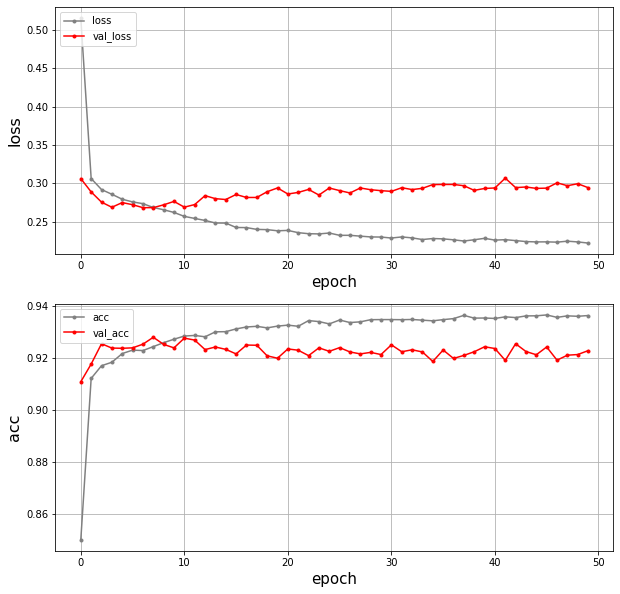

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # 2행 1열 에 첫번째꺼 그리겠다
plt.plot(hist.history['loss'], marker='.', c='gray', label='loss')
plt.plot(hist.history['val_loss'], marker='.', c='red', label='val_loss')
plt.grid()
plt.xlabel('epoch', size=15)
plt.ylabel('loss', size=16)
plt.legend(loc='upper left')

plt.subplot(2,1,2) # 2행 1열 에 두번째꺼 그리겠다
plt.plot(hist.history['acc'], marker='.', c='gray', label='acc')  
plt.plot(hist.history['val_acc'], marker='.', c='red', label='val_acc')
plt.grid()
plt.xlabel('epoch', size=15)
plt.ylabel('acc', size=16)
plt.legend(loc='upper left')
plt.show()

In [9]:
loss, acc = model.evaluate(x_test,y_test) 
print('loss 는',loss)
print('acc 는',acc)

10000/10000 [==============================] - 1s 76us/step
loss 는 0.2984686483338475
acc 는 0.9236000180244446


In [10]:
predict = model.predict(x_test)
# print(predict)
np.argmax(predict, axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [11]:
np.argmax(y_test, axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)